<a href="https://colab.research.google.com/github/lakshmirnair/problem-solving-in-python/blob/master/ML_algorithm/Regression/LR_NYAirnb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshmicse","key":"9fef5e28235ca1cb1ae73973670f2c87"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
#change the permission
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 80.2MB/s]


In [5]:
#unzip the file 
from zipfile import ZipFile
f_name="new-york-city-airbnb-open-data.zip"
with ZipFile(f_name,'r') as zip:
  zip.extractall()
  print("DONE")

DONE


In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import csv 
import os 
import seaborn as sns
import pandas as pd
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#details of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.duplicated().sum()
#removes rows with duplicates if True.
df.drop_duplicates(inplace=True)

In [18]:
#replace null values , inplace=True means fill in place the specified value
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':"No Name"}, inplace=True)
df.fillna({'host_name':"No Host Name"}, inplace=True)
df.fillna({'last_review':"No Review"}, inplace=True)
#or
#val = {'reviews_per_monthe': 0, 'name': 'No Name', 'host_name': 'NO Host Name', 'last_review': "No Review"}
#df.fillna(value=val,inplace=True)

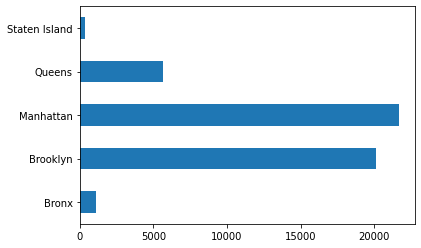

In [19]:
#data  visualisation
# neighborhood_group has the most Airnb houses
df['neighbourhood_group'].value_counts().sort_index().plot.barh()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

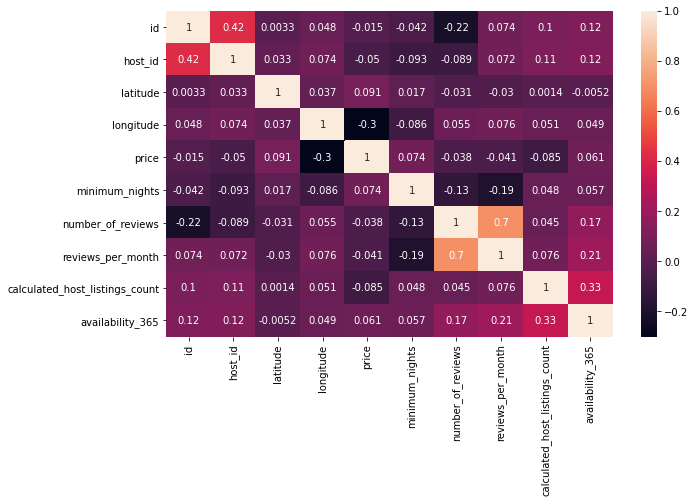

In [22]:
#pearson : standard correlation coefficient, kendall : Kendall Tau correlation coefficient,spearman : Spearman rank correlation
corr = df.corr(method='kendall')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
df.columns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


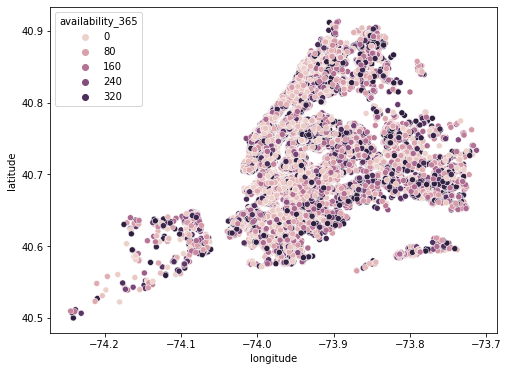

In [24]:
#draw the rough plot of houses 
#Assigning a variable to 'hue' will map its levels to the color of the points
plt.figure(figsize=(8,6)) 
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365) 
#input output mode off 
plt.ioff()

In [25]:
#LR MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [29]:
labelencoder = LabelEncoder()
df['neighbourhood_group'] = labelencoder.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = labelencoder.fit_transform(df['neighbourhood'])
df['room_type'] = labelencoder.fit_transform(df['room_type'])


In [30]:
x = df.iloc[:,[0,7]]
y = df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3,random_state=353)

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = lr.predict(x_test) 
#print('Accuracy on test set: {}'.format(.029))
print('Accuracy on test set: {}'.format(lr.score(x_test, y_test)))

Accuracy on test set: 0.02994271334772014


In [ ]:
# 2% and this might imply that either the
#metric is not suitable for this data set or the data is not impressive enough.